<a href="https://colab.research.google.com/github/juli1001/churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# models from evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve


In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

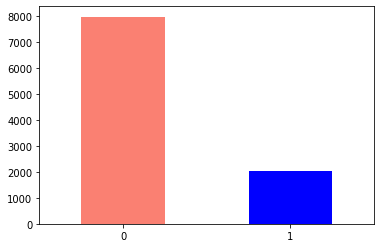

In [7]:
df.Exited.value_counts().plot(kind="bar",color=["salmon","blue"])
plt.xticks(rotation=0)

# frequency according to gender

In [8]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
pd.crosstab(df.Exited,df.Gender)

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


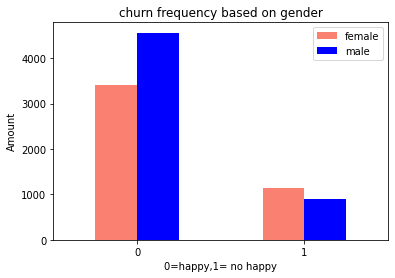

In [10]:
pd.crosstab(df.Exited,df.Gender).plot(kind="bar",color=["salmon","blue"])

plt.title("churn frequency based on gender")
plt.xlabel("0=happy,1= no happy")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

# age vs exited in churn

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


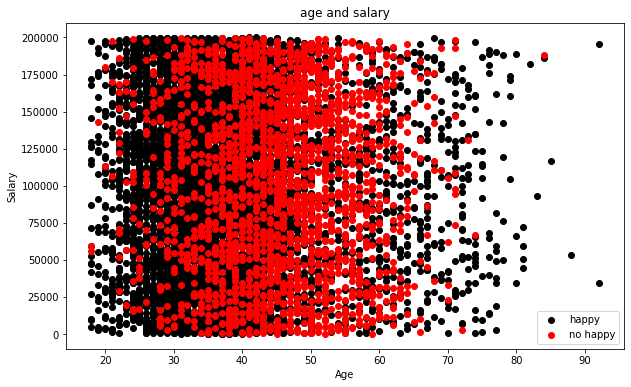

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.Age[df.Exited==0],
          df.EstimatedSalary[df.Exited==0],
          c="black")

plt.scatter(df.Age[df.Exited==1],
          df.EstimatedSalary[df.Exited==1],
          c="red")

plt.title("age and salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(["happy", "no happy"])

# modeling

In [13]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# spliting into Features (X) and Target(y)

In [14]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [15]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X=X.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [18]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [19]:
X.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Geography","Gender"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_x=transformer.fit_transform(X)

# Training and  test split

In [21]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

In [22]:
models={"KNN":KNeighborsClassifier(),
        "Logistic Regresssion":LogisticRegression(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):



  np.random.seed(42)
  model_scores={}

  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
  return model_scores
    


In [23]:
fit_and_score(models,X_train,X_test,y_train,y_test)

{'KNN': 0.764, 'Logistic Regresssion': 0.8005, 'Random Forest': 0.866}

In [24]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_test=y_test,
                           y_train=y_train)

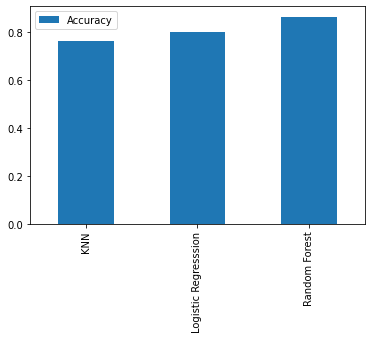

In [25]:
compare=pd.DataFrame(model_scores, index=["Accuracy"])
compare.T.plot.bar()

# **Tuning** **KNN**

In [26]:
train_scores=[]

test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))


In [27]:
train_scores

[1.0,
 0.8385,
 0.841875,
 0.8135,
 0.8155,
 0.80725,
 0.805625,
 0.800875,
 0.79975,
 0.798125,
 0.7985,
 0.796875,
 0.797125,
 0.7965,
 0.79575,
 0.7955,
 0.7955,
 0.795625,
 0.7955,
 0.796125]

In [28]:
test_scores

[0.6865,
 0.782,
 0.739,
 0.7855,
 0.764,
 0.792,
 0.777,
 0.796,
 0.786,
 0.798,
 0.791,
 0.7975,
 0.795,
 0.7975,
 0.7945,
 0.799,
 0.7965,
 0.8005,
 0.8005,
 0.8015]

maximum KNN score on the data frame 80.15%


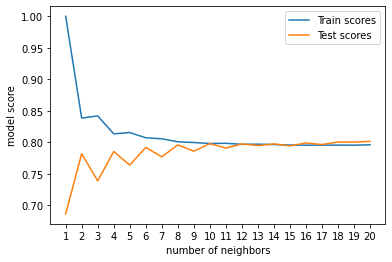

In [29]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()
print("maximum KNN score on the data frame {:.2f}%".format (max(test_scores)*100));

# **# Tuning model with randomized search CV**

In [30]:
# different LogisticRegression Hyperparameters
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# different RandomForestClassifier Hyperparameters
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,20),
         "min_samples_leaf":np.arange(1,20,2)}

In [31]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [33]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 610}

In [35]:
rs_rf.score(X_test,y_test)

0.8615

# **Tuning a model with Grid Search CV**

In [36]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}


gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                              cv=5,
                              verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test,y_test)

0.802

# **Evaluating a calissification Model,beyond Accuracy**

In [39]:
y_preds=gs_log_reg.predict(X_test)

In [40]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

**ROC Curves and AUC scores**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


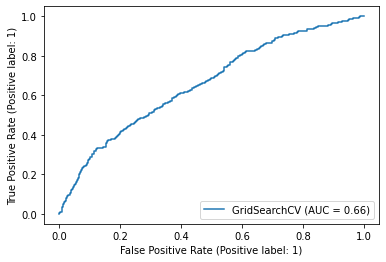

In [41]:
plot_roc_curve(gs_log_reg,X_test,y_test)

**confusion matrix**

In [42]:
print(confusion_matrix(y_test,y_preds))

[[1590   17]
 [ 379   14]]


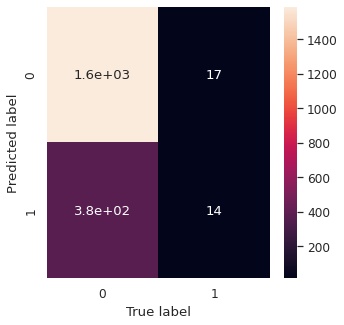

In [43]:
sns.set(font_scale=1.1)
def plot_conf_mat(y_test,y_preds):
  fig,ax=plt.subplots(figsize=(5,5))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=True)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)



**classification** **report**

In [44]:
print (classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.45      0.04      0.07       393

    accuracy                           0.80      2000
   macro avg       0.63      0.51      0.48      2000
weighted avg       0.74      0.80      0.73      2000



In [45]:
clf=LogisticRegression(C=0.0001,
                       solver="liblinear")


In [46]:
cv_acc=cross_val_score(rs_log_reg,transformed_x,y,cv=5,scoring="accuracy")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [69]:
cv_acc=np.mean(cross_val_score(rs_log_reg,transformed_x,y,cv=5,scoring="accuracy"))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [47]:
np.mean(cv_acc)

0.791

In [70]:
cv_acc

0.791

**cross validated precision score**

In [59]:
cv_precision=np.mean(cross_val_score(rs_log_reg,transformed_x,y,cv=5,scoring="precision"))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [63]:
cv_precision 

0.4071170103450233

**cross validated recall score**

In [64]:
cv_recall=np.mean(cross_val_score(rs_log_reg,transformed_x,y,cv=5,scoring="recall"))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [65]:
cv_recall

0.05497542997542998

**cross validated f1 score**

In [66]:
cv_f1=np.mean(cross_val_score(rs_log_reg,transformed_x,y,cv=5,scoring="f1"))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [67]:
cv_f1

0.0966029747412533

# **visualizing cross validated metrics**

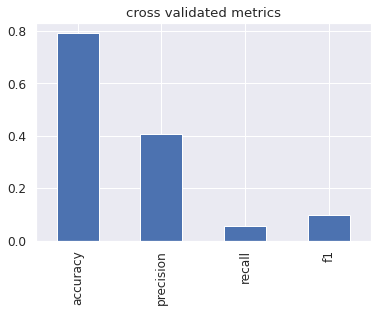

In [71]:
cv_metrics=pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_precision,
                        "recall":cv_recall,
                        "f1":cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="cross validated metrics",legend=False)


# **Feature Importance**

In [72]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.0001, solver='liblinear')

In [73]:
clf.coef_

array([[-6.83830563e-04,  7.48131027e-04, -2.45547490e-04,
         6.86306200e-04, -8.67553226e-04, -4.19638020e-03,
         3.09784213e-02, -1.41446367e-03,  3.66081438e-06,
        -4.25601768e-04, -1.68119192e-04, -1.19244138e-03,
        -1.28095740e-06]])

In [74]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [75]:
feature_dict

{'Age': 0.030978421275190713,
 'Balance': 3.6608143797677607e-06,
 'CreditScore': 0.0006863062003444552,
 'CustomerId': 0.0007481310269516415,
 'EstimatedSalary': -1.2809573977682674e-06,
 'Gender': -0.004196380202710486,
 'Geography': -0.000867553226427567,
 'HasCrCard': -0.00016811919212217236,
 'IsActiveMember': -0.0011924413750774277,
 'NumOfProducts': -0.00042560176813884534,
 'RowNumber': -0.0006838305634612342,
 'Surname': -0.00024554748957351426,
 'Tenure': -0.0014144636655660423}

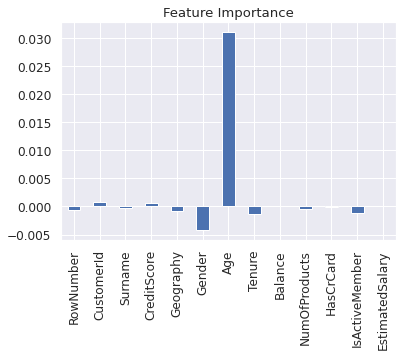

In [76]:
features_df=pd.DataFrame(feature_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance",legend=False);